Save dataset to ROOT file after processing

In [70]:
import ROOT

df = ROOT.RDataFrame("dataset", "data/example_file.root")
df1 = df.Define("c", "a + b")

out_treename = "outtree"
out_filename = "outtree.root"
out_columns = ["a", "b", "c"]
snapdf = df1.Snapshot(out_treename, out_filename, out_columns)

In [71]:
%%bash
rootls -lt outtree.root

TTree  Mar 16 20:31 2024 outtree;1 "outtree" 
  a  "a/D"  16071
  b  "b/D"  16071
  c  "c/D"  16071
  Cluster INCLUSIVE ranges:
   - # 0: [0, 1999]
  The total number of clusters is 1


In [72]:
snapdf.Display().Print()

+-----+------------+------------+------------+
| Row | a          | b          | c          | 
+-----+------------+------------+------------+
| 0   | 0.97771140 | 0.99974175 | 1.9774531  | 
+-----+------------+------------+------------+
| 1   | 2.2802012  | 0.48497361 | 2.7651748  | 
+-----+------------+------------+------------+
| 2   | 0.56348245 | 0.39231399 | 0.95579645 | 
+-----+------------+------------+------------+
| 3   | 3.0421559  | 0.33353925 | 3.3756951  | 
+-----+------------+------------+------------+
| 4   | 28.574399  | 0.64812557 | 29.222524  | 
+-----+------------+------------+------------+


Cutflow reports

In [73]:
df = ROOT.RDataFrame("sig_tree", "Higgs_data.root")

filter1 = df.Filter("lepton_eta > 0", "Lepton eta cut")
filter2 = df.Filter("lepton_phi < 1", "Lepton phi cut")

rep = df.Report()
rep.Print()

Lepton eta cut: pass=4880       all=10000      -- eff=48.80 % cumulative eff=48.80 %
Lepton phi cut: pass=7843       all=10000      -- eff=78.43 % cumulative eff=78.43 %


Using C++ functions in Python

In [74]:
%%cpp

float asfloat(unsigned long long entrynumber) {
    return entrynumber;
}

In [75]:
%%cpp

float square(float val) {
    return val * val;
}

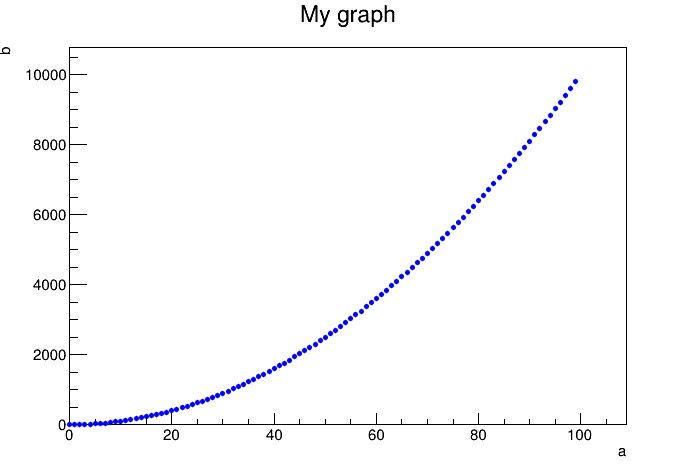

In [76]:
df = ROOT.RDataFrame(100)

df1 = df.Define("a", "asfloat(rdfentry_)")
df2 = df1.Define("b", "square(a)")

c = ROOT.TCanvas()
graph = df2.Graph("a", "b")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetTitle("My graph")
graph.Draw("AP")
c.Draw()

Using all cores of your machine with multi-threaded RDataFrame

In [77]:
%%time

treename = "Events"
filename = "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
df = ROOT.RDataFrame(treename, filename)

df.Sum("nMuon").GetValue()

CPU times: user 8.29 s, sys: 447 ms, total: 8.73 s
Wall time: 13.1 s


149322456.0

In [78]:
%%time

ROOT.EnableImplicitMT()

treename = "Events"
filename = "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
df = ROOT.RDataFrame(treename, filename)

df.Sum("nMuon").GetValue()

ROOT.DisableImplicitMT()

CPU times: user 12.6 s, sys: 941 ms, total: 13.5 s
Wall time: 8.03 s
